# Proyek Analisis Data: Bike_sharing_dataset.zip
- **Nama:** Ferdinanta Ginting
- **Email:** ferdinantag8@gmail.com
- **ID Dicoding:** ferdinanta_ginting

## Menentukan Pertanyaan Bisnis

- Hari apa dan jam berapa permintaan sewa sepeda paling tinggi?
- Apakah ada pengaruh kondisi cuaca atau musim terhadap harga sewa sepeda?
- kelompok pengguna mana yang paling banyak memakai jasa sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

menampilkan data dengan 5 baris pertama saja

In [6]:
dataDay = pd.read_csv('./data/day.csv')
dataDay.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
dataHour = pd.read_csv('./data/hour.csv')
dataHour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Memeriksa apakah data ada yang bernilai null
- Memeriksa apakah ada data yang nilainya duplikat
- Melihat informasi dari dataset berupa informasi jumlah kolom,jumlah baris data,ukuran memory,dan type data

In [8]:
print("Memeriksa data yang null")
print(dataDay.isnull().sum())
print()
print(dataHour.isnull().sum())
print("Memeriksa data duplikat")
print(dataDay.duplicated().sum())
print(dataHour.duplicated().sum())
print("Melihat informasi data")
print(dataDay.info())
print()
print(dataHour.info())

Memeriksa data yang null
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Memeriksa data duplikat
0
0
Melihat informasi data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        7

### Cleaning Data

### **Tidak perlu membersihkan data karena data sudah bersih dan tidak ada duplikat**

## Exploratory Data Analysis (EDA)

### Explore ...

- menampilkan jumlah keseluruhan data dari kolom casual,registered dan cnt yang merupakan gabungan dari jumlah kolom casual dan registered.
- menampilkan jumlah baris kolom hr
- menampilkan jumlah data dari kolom weekday,season dan weathersit.

In [9]:

print(dataDay['casual'].sum())
print(dataDay['registered'].sum())
print(dataDay['cnt'].sum())
print(dataHour['hr'].count())
print(dataDay['weekday'].sum())
print(dataDay['season'].sum())
print(dataDay['weathersit'].sum())


620017
2672662
3292679
17379
2191
1825
1020


## Visualization & Explanatory Analysis

### Pertanyaan 1:Hari apa dan jam berapa permintaan sewa sepeda paling tinggi?

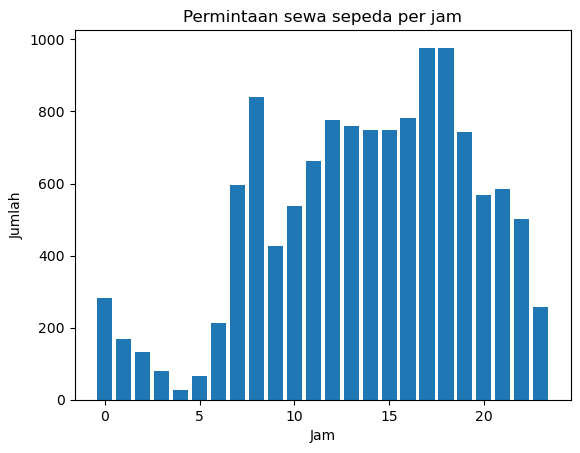

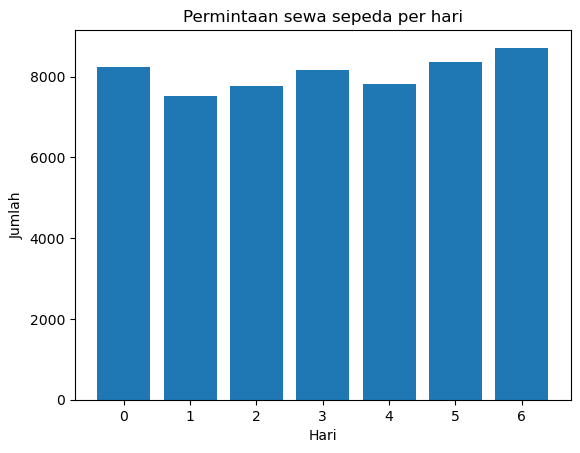

In [10]:
plt.bar(x='hr',data= dataHour,height='cnt')
plt.title('Permintaan sewa sepeda per jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

plt.bar(x='weekday',data= dataDay,height='cnt')
plt.title('Permintaan sewa sepeda per hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.show()

### Pertanyaan 2:Apakah ada pengaruh kondisi cuaca atau musim terhadap permintaan sewa sepeda?

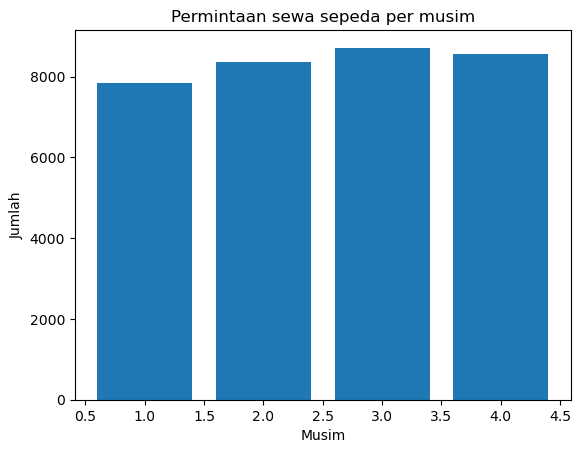

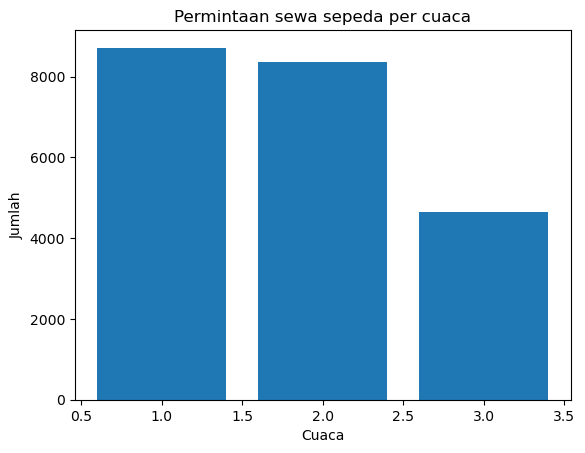

In [11]:
plt.bar(x='season',data= dataDay,height='cnt')
plt.title('Permintaan sewa sepeda per musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.show()

plt.bar(x='weathersit',data= dataDay,height='cnt')
plt.title('Permintaan sewa sepeda per cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.show()

### Pertanyaan 3: kelompok pengguna mana yang paling banyak memakai jasa sewa sepeda?

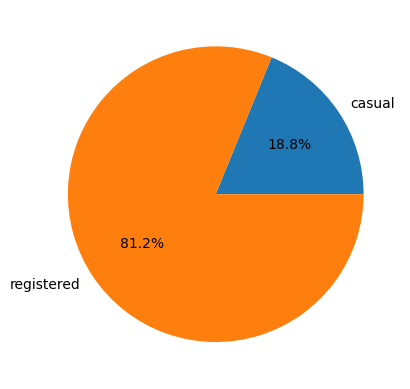

In [12]:
plt.pie(x=[dataDay['casual'].sum(),dataDay['registered'].sum()],labels=['casual','registered'],autopct='%1.1f%%')
plt.show()

## Conclusion

- Conclution pertanyaan 1


1.   permintaan sewa sepeda paling tinggi berdasarkan jam ada pada jam 17 dan 18 atau jam 5.00 dan jam 6.00 sore dengan jumlah permintaan hampir 1000.
2.   permintaan sewa sepeda paling tinggi berdasarkan hari ada pada hari sabtu dengan jumlah permintaan lebih dari 800.


- Conclution pertanyaan 2
#### Terdapat pengaruh kondisi cuaca atau musim untuk permintaan sewa sepeda dapat kita lihat bahwa permintaan tinggi pada Musim gugur dan cuaca cerah sedangkan pada cuaca yang bersalju tidak ada permintaan.

- Conclution pertanyaan 3
#### kelompok pengguna yang paling banyak memakai jasa sewa sepeda adalah pengguna terdaftar dengan persentasi 81.2%
